### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:

    1) Which variables are significant in predicting the price of a house, and
    2) How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal of the Assignment:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### The steps to be followed in this exercise are as follows:

1) Reading and Understanding the data

2) Data Cleaning

3) Exploratory Data Analysis (EDA)

4) Preparing the data 

5) Model Building and Evluation
    (i)    Ridge Regression Model
    (ii)   Lasso Regression Model

## Step 1: Reading and Understanding the Data

    1. Importing the required libraries
    2. Understanding the structure of the data

In [1]:
# importing all the important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn import metrics
import os, sys
import math
import statsmodels.api as sm
import datetime

%matplotlib inline
pd.options.display.max_colwidth = 200
pd.options.display.max_rows=100
pd.options.display.max_columns=500

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_df = pd.read_csv('train.csv')

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.shape

(1460, 81)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Step 2: Data Cleaning

### Checking for NULLs

In [8]:
NA_col = house_df.isnull().sum()

In [9]:
# find out columns which have nulls
NA_col = NA_col[NA_col > 0]

In [10]:
# % of columns missing
print(round(100*NA_col[NA_col > 0]/len(house_df),2))

LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


### Considering 10% as threshold, so removing columns whose missing values are > 10%

In [11]:
house_df = house_df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

In [12]:
house_df.shape

(1460, 74)

### Finding the age of a property

In [13]:
house_df['YearBuilt_Old'] = house_df.YearBuilt.max()-house_df.YearBuilt
house_df['YearRemodAdd_Old'] = house_df.YearRemodAdd.max()-house_df.YearRemodAdd
house_df['GarageYrBlt_Old'] = house_df.GarageYrBlt.max()-house_df.GarageYrBlt
house_df['YrSold_Old'] = house_df.YrSold.max()-house_df.YrSold
house_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
85,1991,1992,1991.0,2006,19,18,19.0,4
216,2004,2004,2004.0,2008,6,6,6.0,2
794,1994,1996,1994.0,2008,16,14,16.0,2
1331,1976,1976,1976.0,2006,34,34,34.0,4
148,2004,2005,NaN,2008,6,5,NaN,2
79,1910,1981,1966.0,2009,100,29,44.0,1
1292,1892,1965,1985.0,2009,118,45,25.0,1
793,2007,2007,2007.0,2007,3,3,3.0,3
519,1926,2004,1926.0,2009,84,6,84.0,1
1255,1931,1950,1978.0,2007,79,60,32.0,3


In [14]:
house_df.shape

(1460, 78)

### Dropping the actual year columns

In [15]:
house_df = house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [16]:
house_df.shape

(1460, 74)

### Imputing Mising Values

In [17]:
house_df.MasVnrType.fillna('None',inplace=True)
house_df.MasVnrArea.fillna(house_df.MasVnrArea.mean(),inplace=True)
house_df.BsmtQual.fillna('TA',inplace=True)
house_df.BsmtCond.fillna('TA',inplace=True)
house_df.BsmtExposure.fillna('No',inplace=True)
house_df.BsmtFinType1.fillna('Unf',inplace=True)
house_df.BsmtFinType2.fillna('Unf',inplace=True)
house_df.GarageType.fillna('Attchd',inplace=True)
house_df.GarageYrBlt_Old.fillna(-1,inplace=True)
house_df.GarageFinish.fillna('Unf',inplace=True)
house_df.GarageQual.fillna('TA',inplace=True)
house_df.GarageCond.fillna('TA',inplace=True)

### Removing Unnnecessary Columns as they don't provide any meaningful insight

In [18]:
house_df.Street.value_counts()
house_df.Utilities.value_counts()
house_df = house_df.drop(['Street','Utilities', 'Id'],axis='columns')

In [19]:
house_df.shape

(1460, 71)

In [20]:
house_df[list(house_df.dtypes[house_df.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


## Step 3: Exploratory Data Analysis (EDA)

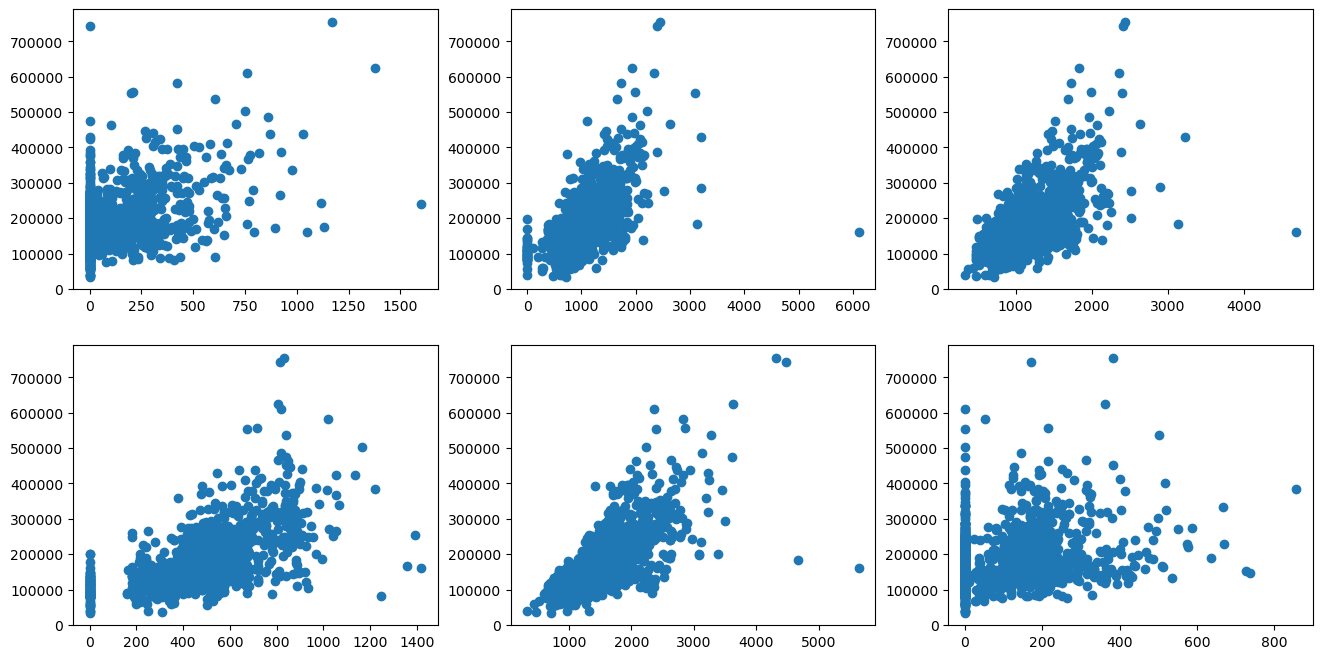

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_df.MasVnrArea,house_df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_df.TotalBsmtSF,house_df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_df['1stFlrSF'],house_df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_df['GarageArea'],house_df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_df['GrLivArea'],house_df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_df['WoodDeckSF'],house_df.SalePrice)

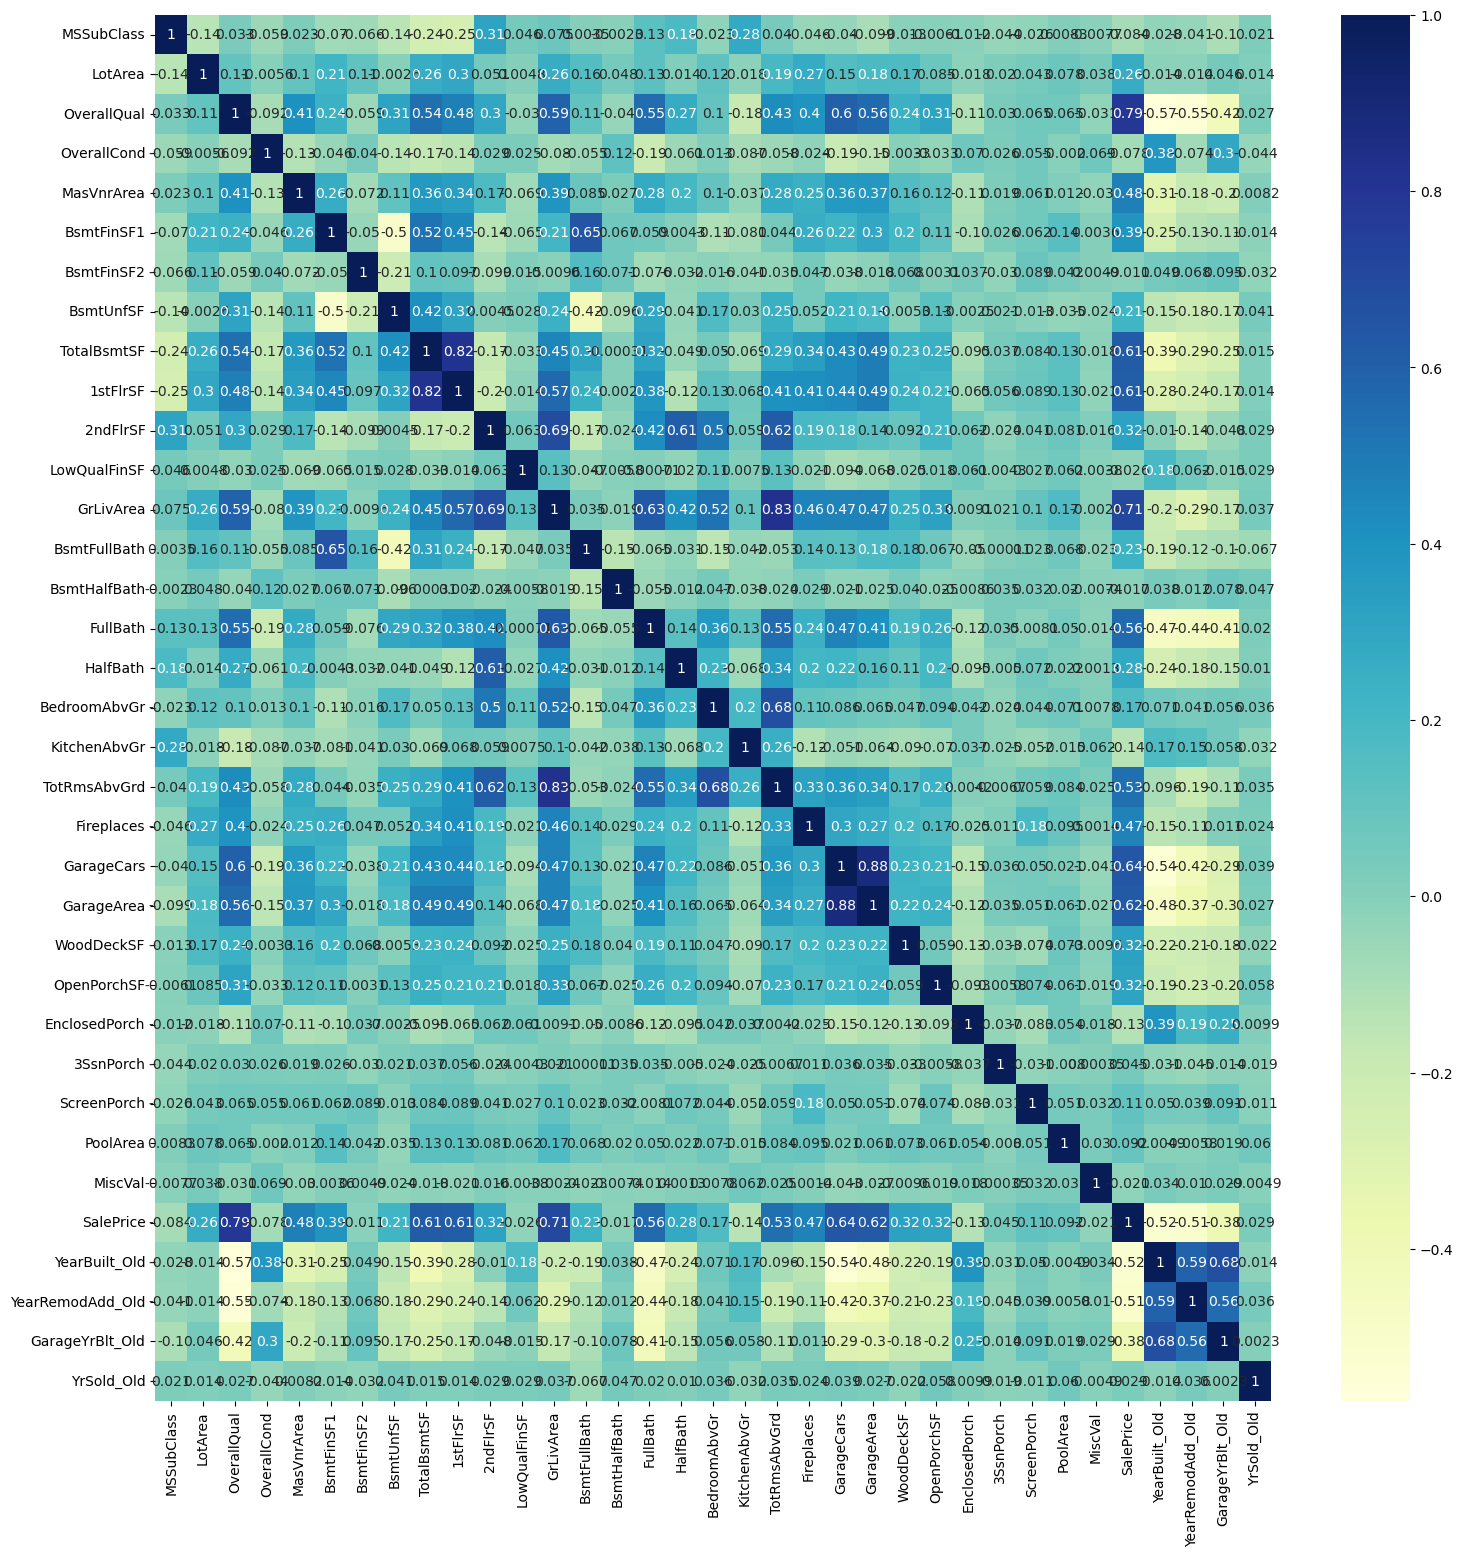

In [22]:
plt.figure(figsize = (18,18))
sns.heatmap(house_df[list(house_df.dtypes[house_df.dtypes!='object'].index)].corr(),annot=True, cmap="YlGnBu")
plt.show()

In [23]:
corr_val = house_df[list(house_df.dtypes[house_df.dtypes != 'object'].index)].corr()

In [24]:
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


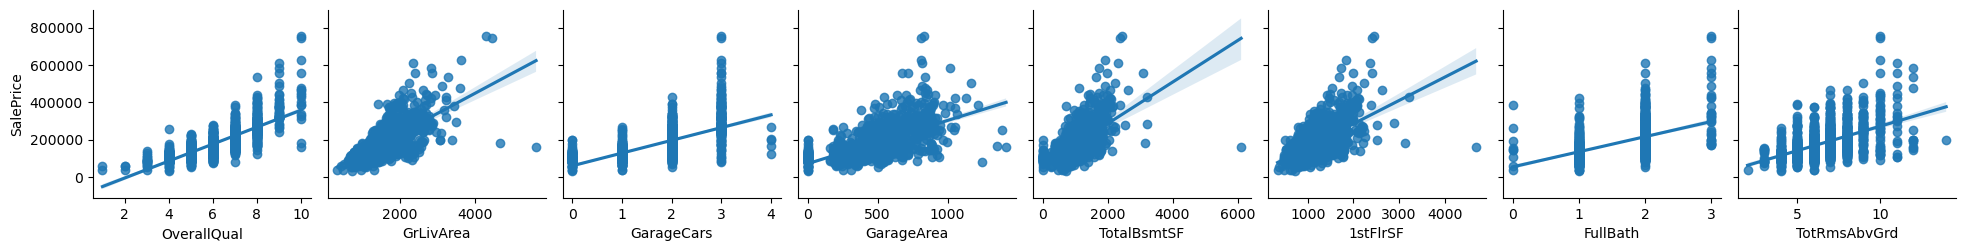

In [25]:
### Pair plot for the correlated features
sns.pairplot(house_df, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg")

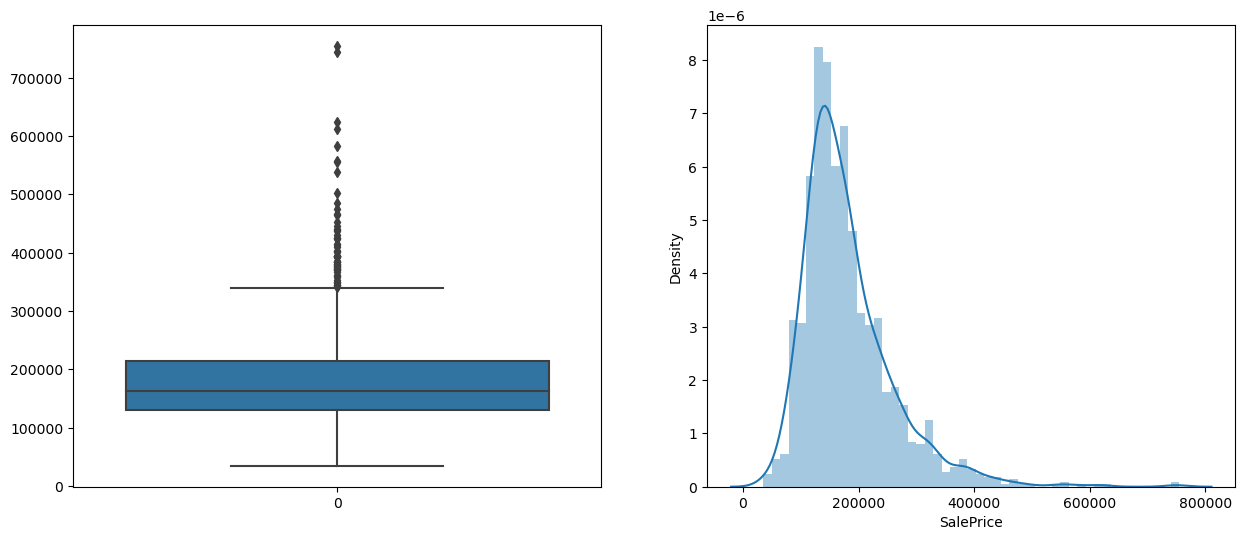

In [26]:
# checking the SalePrice as well
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(house_df['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(house_df['SalePrice'], ax=axes[1])
plt.show()

In [27]:
house_df.shape

(1460, 71)

### Dropping Outliers

In [28]:
num_col = list(house_df.dtypes[house_df.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_df = drop_outliers(house_df)

In [29]:
house_df.shape

(1441, 71)

In [30]:
house_df[list(house_df.dtypes[house_df.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.0,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,56.818182,10025.664816,6.092991,5.571131,103.350786,436.698820,45.505899,569.063845,1051.268563,1157.319917,344.181818,5.649549,1507.151284,0.421235,0.056905,1.561416,0.383761,2.861207,1.045802,6.503817,0.603053,1.767523,472.123525,93.302568,46.553782,21.759889,3.102012,14.837613,0.0,16.997918,180112.231783,38.677307,25.181818,29.610687,2.183206
std,42.187465,5463.989139,1.379296,1.110230,179.925607,432.610384,160.254975,442.617790,416.210745,373.572700,432.813756,47.868367,505.896946,0.514586,0.237659,0.549504,0.501927,0.814897,0.218862,1.609052,0.636258,0.748666,212.577806,123.769993,66.047279,59.778706,26.339952,54.822808,0.0,108.909905,78048.215908,30.286032,20.684441,25.135171,1.327496
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,0.000000,225.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,129900.000000,9.000000,6.000000,7.000000,1.000000
50%,50.000000,9439.000000,6.000000,5.000000,0.000000,379.000000,0.000000,481.000000,990.000000,1082.000000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.000000,162000.000000,37.000000,16.000000,25.000000,2.000000
75%,70.000000,11500.000000,7.000000,6.000000,164.000000,706.000000,0.000000,811.000000,1286.000000,1383.000000,728.000000,0.000000,1771.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,213250.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,70761.000000,10.000000,9.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,386.000000,407.000000,480.000000,0.0,1400.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


### Finding variables which are having some order to describe that they are ordinal in nature

In [31]:
house_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


### Transforming the above vairiables

In [32]:
house_df['LandSlope'] = house_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_df['ExterQual'] = house_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['BsmtQual'] = house_df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtCond'] = house_df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtExposure'] = house_df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_df['BsmtFinType1'] = house_df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['BsmtFinType2'] = house_df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['HeatingQC'] = house_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['CentralAir'] = house_df.CentralAir.map({'N':0,'Y':1})
house_df['KitchenQual'] = house_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['GarageFinish'] = house_df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_df['GarageQual'] = house_df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['GarageCond'] = house_df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['ExterCond'] = house_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['LotShape'] = house_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [33]:
house_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


### Creating and joining dummy column with the actual dataset

In [34]:
dummy_col = pd.get_dummies(house_df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_df = pd.concat([house_df,dummy_col],axis='columns')

house_df = house_df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

### Checking the distribution of target variable before scaling and splitting

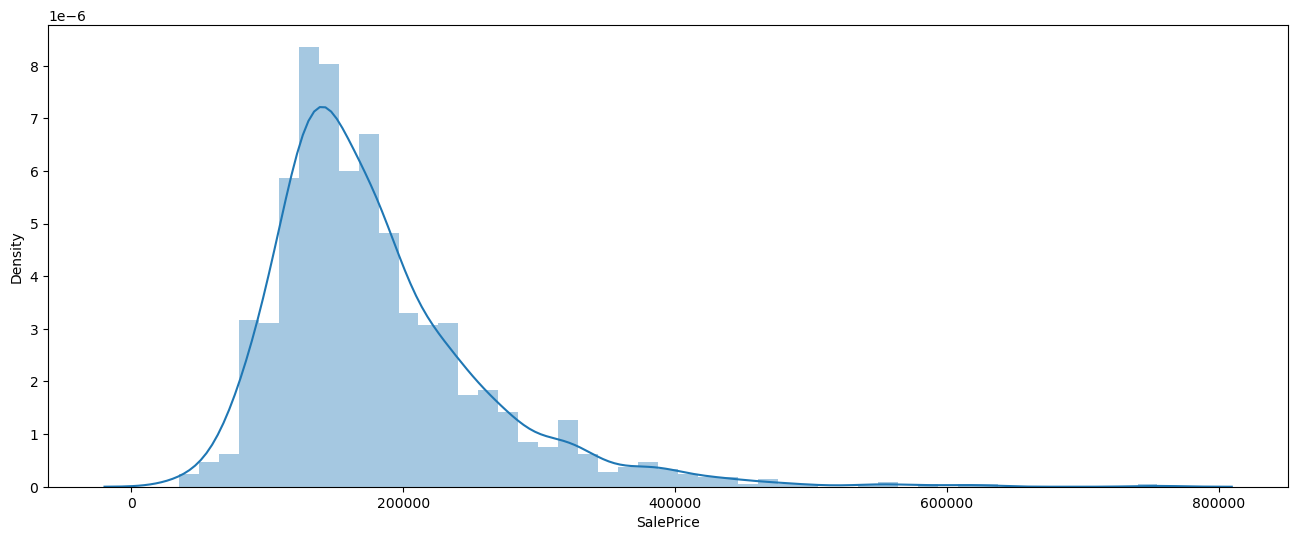

In [35]:
plt.figure(figsize=(16,6))
sns.distplot(house_df.SalePrice)
plt.show()

## Step 4: Preparing the data 

### Creating train and test dataset for validation purpose

In [36]:
df_train,df_test = train_test_split(house_df,train_size=0.7,test_size=0.3,random_state=42)

In [37]:
house_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


### Scaling the train dataset

In [38]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

### Distribution after scaling

<Axes: xlabel='SalePrice', ylabel='Density'>

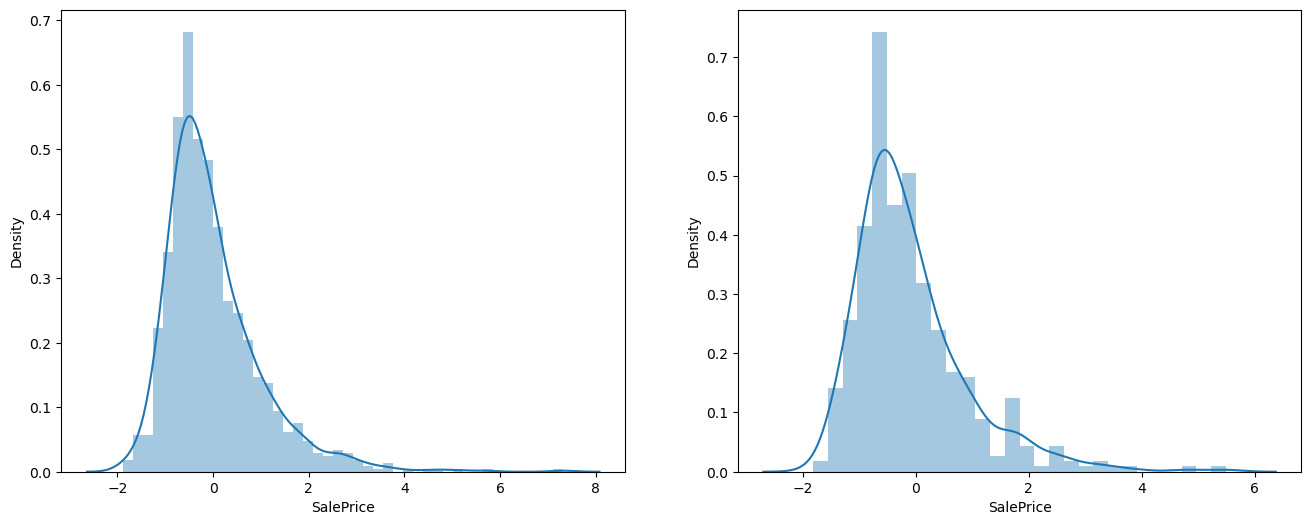

In [39]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

### Splitting the dependent and independent variable

In [40]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [41]:
y_test = df_test.pop('SalePrice')
X_test = df_test

### Using RFE to find the optimal number of feature

In [42]:
len(X_train.columns)

192

In [43]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm,n_features_to_select=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [44]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [45]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [46]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Step 5: Model Building and Evluation

## (i) Ridge Regression Model

In [47]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8986454468924996
0.8393985218213118


### As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

### Lets try to improve our model with the optimal value of alpha using GridSearchCV

In [48]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004172,0.000506,0.002332,0.000356,0.001,{'alpha': 0.001},0.838829,0.902968,0.774912,0.873062,0.903821,0.878370,0.902993,0.546269,0.880911,0.910206,0.841234,0.105676,8,0.900963,0.896851,0.906725,0.900847,0.897044,0.899819,0.896093,0.911217,0.898777,0.896530,0.900487,0.004667
1,0.003962,0.000284,0.002206,0.000106,0.010,{'alpha': 0.01},0.839284,0.902944,0.777622,0.873072,0.903977,0.878427,0.903123,0.545640,0.881183,0.910292,0.841556,0.105718,7,0.900961,0.896850,0.906722,0.900846,0.897043,0.899818,0.896092,0.911216,0.898776,0.896529,0.900485,0.004667
2,0.004240,0.000569,0.002332,0.000280,0.100,{'alpha': 0.1},0.842585,0.902670,0.800303,0.873154,0.905289,0.878892,0.904224,0.539933,0.883568,0.911052,0.844167,0.106453,5,0.900854,0.896753,0.906402,0.900750,0.896944,0.899716,0.895991,0.911162,0.898673,0.896430,0.900368,0.004648
3,0.003687,0.000164,0.002096,0.000015,0.200,{'alpha': 0.2},0.844645,0.902311,0.818404,0.873222,0.906349,0.879239,0.905126,0.534561,0.885706,0.911739,0.846130,0.107615,4,0.900604,0.896511,0.905659,0.900509,0.896699,0.899465,0.895738,0.911031,0.898420,0.896186,0.900082,0.004613
4,0.003675,0.000102,0.002118,0.000027,0.500,{'alpha': 0.5},0.847100,0.901055,0.848242,0.873313,0.908235,0.879724,0.906649,0.522180,0.890335,0.913244,0.849008,0.111233,3,0.899487,0.895358,0.902608,0.899351,0.895531,0.898290,0.894532,0.910421,0.897222,0.895025,0.898783,0.004561


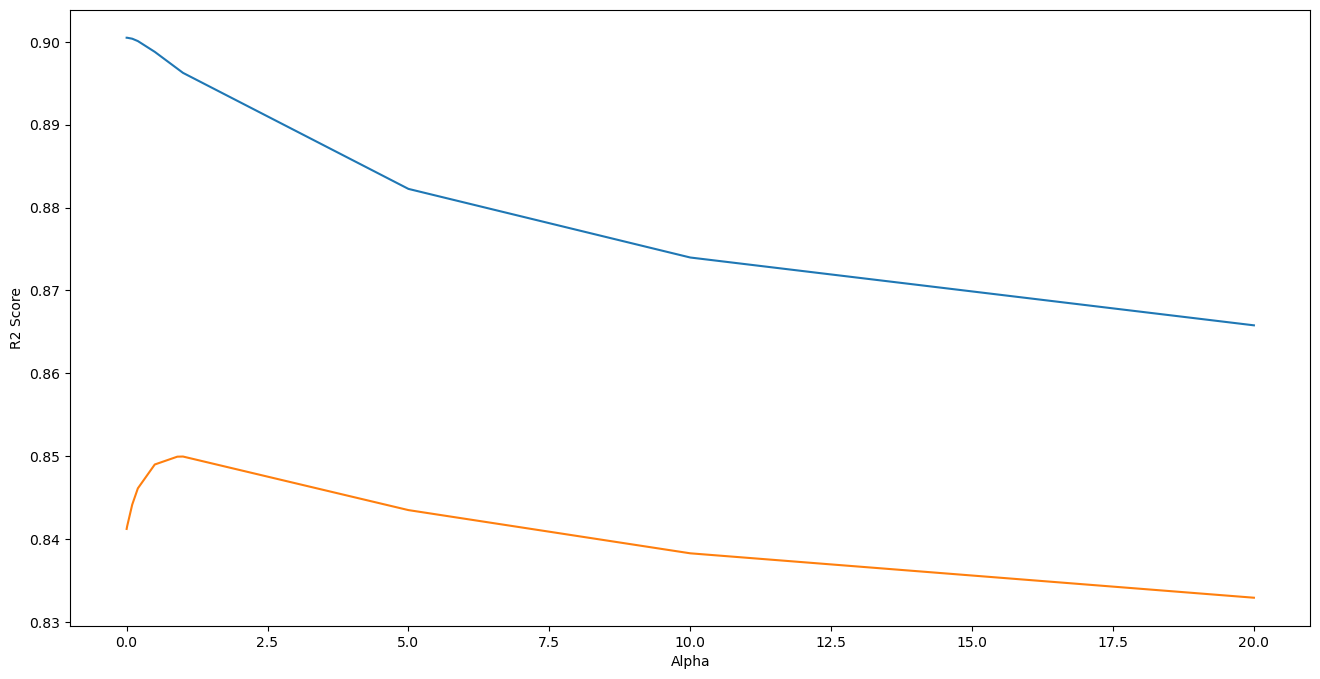

In [50]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

### Checking the best hyperparameter (Alpha value) 

In [51]:
model_cv.best_params_

{'alpha': 1.0}

In [52]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8956246494619226
0.8516130564353104


In [53]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [54]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
48,YrSold_Old,1.441194
67,Neighborhood_Gilbert,0.537550
39,OpenPorchSF,0.391804
28,BedroomAbvGr,0.371212
45,YearBuilt_Old,0.299974
68,Neighborhood_IDOTRR,0.287912
58,LotConfig_FR3,0.261109
42,ScreenPorch,0.255782
43,PoolArea,0.247952
11,BsmtExposure,0.232929


## (ii) Lasso Regression Model

In [55]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8894216729689641
0.8551011795260077


In [56]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.089),
 ('LotArea', -0.137),
 ('LotShape', 0.222),
 ('LandSlope', 0.186),
 ('OverallQual', 0.171),
 ('OverallCond', 0.037),
 ('MasVnrArea', -0.0),
 ('ExterQual', 0.063),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.026),
 ('BsmtCond', -0.028),
 ('BsmtExposure', 0.396),
 ('BsmtFinType1', 0.143),
 ('BsmtFinSF1', 0.009),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.093),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.099),
 ('HeatingQC', 0.193),
 ('CentralAir', -0.054),
 ('1stFlrSF', -0.037),
 ('2ndFlrSF', -0.137),
 ('LowQualFinSF', -0.256),
 ('GrLivArea', -0.121),
 ('BsmtFullBath', -0.139),
 ('BsmtHalfBath', -0.19),
 ('FullBath', -0.251),
 ('HalfBath', -0.215),
 ('BedroomAbvGr', 0.415),
 ('KitchenAbvGr', -0.249),
 ('KitchenQual', -0.198),
 ('TotRmsAbvGrd', -0.17),
 ('Fireplaces', -0.211),
 ('GarageFinish', 0.007),
 ('GarageCars', 0.154),
 ('GarageArea', -0.076),
 ('GarageQual', -0.003),
 ('GarageCond', -0.089),
 ('WoodDeckSF', -2.056),
 ('OpenPorchSF', 0.231),
 ('EnclosedPorch', -0.0),

### Lets try to improve our model with the optimal value of alpha using GridSearchCV

In [57]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.023725,0.001532,0.002418,0.000237,0.001,{'alpha': 0.001},0.843086,0.901153,0.800293,0.872605,0.909369,0.872566,0.904616,0.467387,0.888178,0.919127,0.837838,0.127989,1,0.892440,0.887236,0.896599,0.891050,0.887458,0.890314,0.886265,0.902372,0.889971,0.887065,0.891077,0.004784
1,0.006189,0.000533,0.002129,0.000019,0.010,{'alpha': 0.01},0.813434,0.863507,0.821406,0.835646,0.882398,0.846393,0.884673,0.396259,0.867017,0.917792,0.812852,0.142048,2,0.842262,0.837886,0.843951,0.839078,0.835385,0.838861,0.834558,0.870091,0.839051,0.833974,0.841510,0.009991
2,0.004867,0.000267,0.002005,0.000102,0.100,{'alpha': 0.1},0.732305,0.802901,0.761062,0.745494,0.803622,0.782021,0.822166,0.475015,0.820417,0.861699,0.760670,0.102116,3,0.783055,0.775896,0.776413,0.782350,0.776152,0.779502,0.769304,0.812022,0.777576,0.773929,0.780620,0.011128
3,0.004448,0.000124,0.002085,0.000107,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011498,0.011066,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004434,0.000200,0.002053,0.000068,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011498,0.011066,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


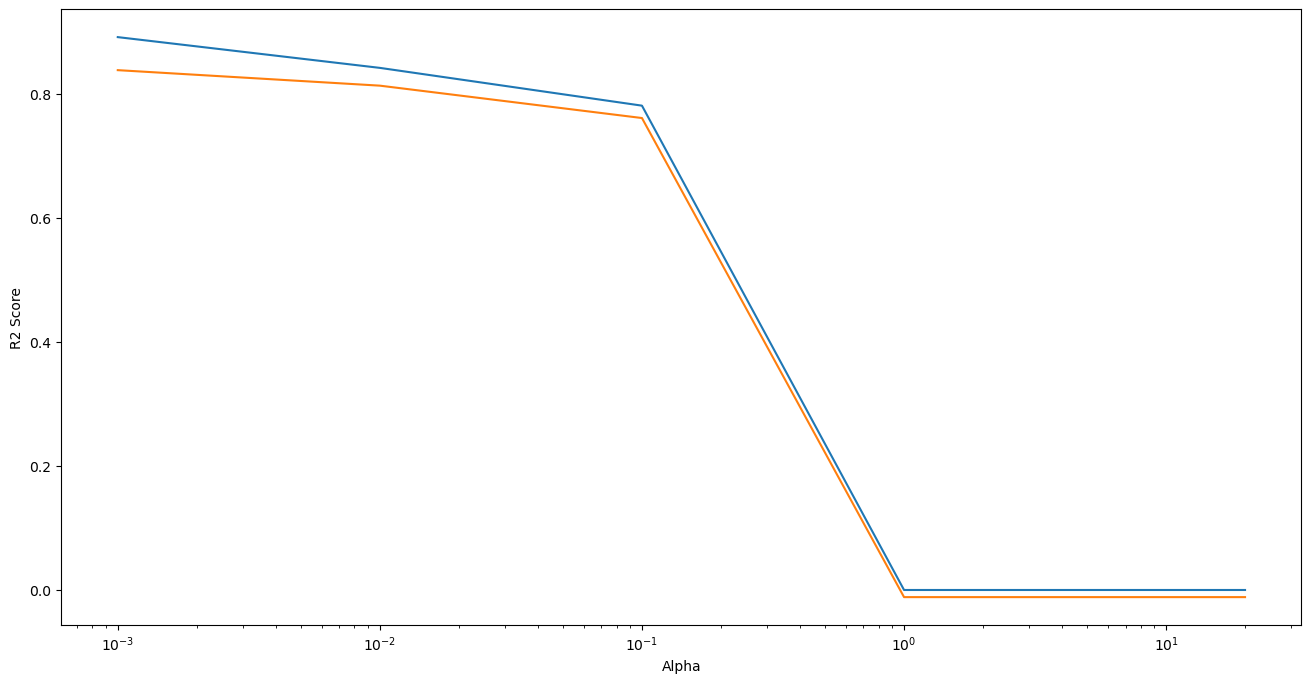

In [59]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

### Checking the best hyperparameter (Alpha value) 

In [60]:
model_cv.best_params_

{'alpha': 0.001}

In [61]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8894216729689641
0.8551011795260077


In [62]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [63]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
48,YrSold_Old,1.462311
28,BedroomAbvGr,0.414666
11,BsmtExposure,0.396013
67,Neighborhood_Gilbert,0.335067
39,OpenPorchSF,0.230738
2,LotShape,0.222187
18,HeatingQC,0.193464
62,Neighborhood_BrkSide,0.189158
3,LandSlope,0.185614
42,ScreenPorch,0.173085


## Comparison between Training Data set and Test Data set 

##    <span style="color:red"> Ridge Regression </span>
### . Train Dataset R^2 = 0.895
### . Test Dataset R^2 = 0.851

##    <span style="color:red"> Lasso Regression </span>
### . Train Dataset R^2 = 0.889
### . Test Dataset R^2 = 0.855

### After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them
### But, as lasso regression will penalize more on the dataset and can also help in feature elemination, considering that as my final model.

## Final Model

In [64]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8894216729689641
0.8551011795260077


### After compairing both the model we can see that the below Features are best explaining the DataSet

### <span style="color:red"> MiscVal </span>      : $Value of miscellaneous feature 
### <span style="color:red"> BsmtHalfBath </span> : Basement half bathrooms
### <span style="color:red"> LowQualFinSF </span> : Low quality finished square feet (all floors)
### <span style="color:red"> BsmtFullBath </span> : Basement full bathrooms
### <span style="color:red"> HalfBath </span>     : Half baths above grade

## Best alpha value for Ridge : {'alpha': 0.9}
## Best alpha value for Lasso : {'alpha': 0.001}